Used dataset : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# **Problem Statement**

Telecommunication companies face significant challenges in customer retention. A high churn rate negatively impacts revenue and necessitates costly customer acquisition efforts. This project aims to address this challenge by building a model to predict customer churn using the Telco Customer Churn dataset. By identifying customers at high risk of churning, proactive interventions can be implemented to improve customer satisfaction and loyalty, ultimately reducing churn and boosting profitability

# **Objective**

The primary objective of this project is to develop a predictive model that accurately identifies customers who are likely to churn in the near future. This model will leverage historical customer data to identify key factors and patterns associated with churn, enabling the company to proactively target at-risk customers with retention strategies.

# **Importing Libraries**

### Importing and uderstanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data cleaning

In [ ]:
from sklearn.preprocessing import LabelEncoder

# **Loading the dataset**

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The dataset contains 21 columns.

1. **customerID**: Unique identifier for each customer (string/object).
2. **gender**: Gender of the customer (e.g., Male, Female).
3. **SeniorCitizen**: Indicates whether the customer is a senior citizen (1 for Yes, 0 for No).
4. **Partner**: Indicates whether the customer has a partner (Yes or No).
5. **Dependents**: Indicates whether the customer has dependents (Yes or No).
6. **tenure**: Number of months the customer has stayed with the company.
7. **PhoneService**: Indicates whether the customer has phone service (Yes or No).
8. **MultipleLines**: Indicates whether the customer has multiple phone lines (Yes, No, or No phone service).
9. **InternetService**: Type of internet service the customer has (e.g., DSL, Fiber optic, No).
10. **OnlineSecurity**: Indicates whether the customer has online security add-on (Yes, No, or No internet service).
11. **OnlineBackup**: Indicates whether the customer has online backup add-on (Yes, No, or No internet service).
12. **DeviceProtection**: Indicates whether the customer has device protection add-on (Yes, No, or No internet service).
13. **TechSupport**: Indicates whether the customer has tech support add-on (Yes, No, or No internet service).
14. **StreamingTV**: Indicates whether the customer has streaming TV service (Yes, No, or No internet service).
15. **StreamingMovies**: Indicates whether the customer has streaming movies service (Yes, No, or No internet service).
16. **Contract**: Type of contract the customer has (e.g., Month-to-month, One year, Two year).
17. **PaperlessBilling**: Indicates whether the customer uses paperless billing (Yes or No).
18. **PaymentMethod**: Customer's payment method (e.g., Electronic check, Mailed check, Bank transfer, Credit card).
19. **MonthlyCharges**: Monthly charges for the customer (numeric/float).
20. **TotalCharges**: Total charges billed to the customer (stored as string, may need conversion to numeric).

**Target variable**

21. **Churn**: Indicates whether the customer has churned (Yes or No).


# **Basic Understanding of the Dataset**

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


# **Basic Visualization**

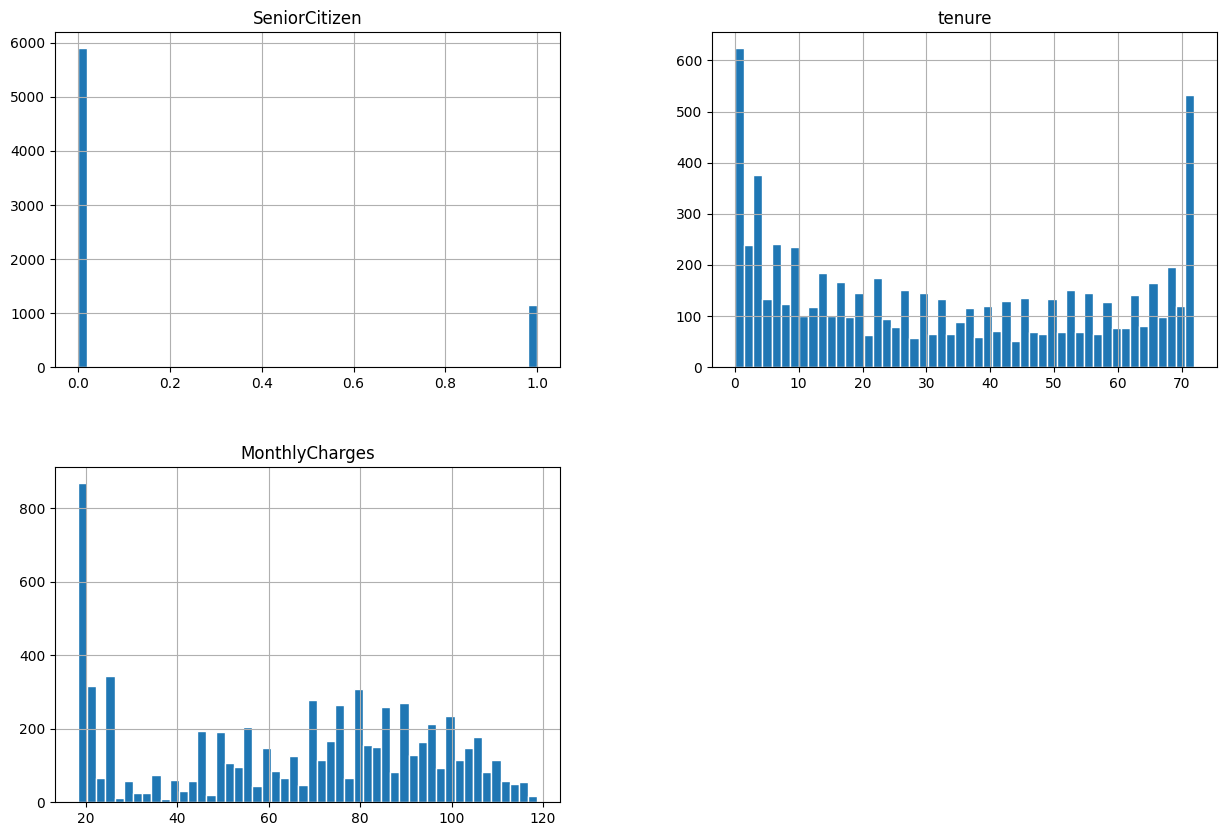

In [ ]:
df.hist(edgecolor  ='w', bins = 50, figsize = (15,10))
plt.show()

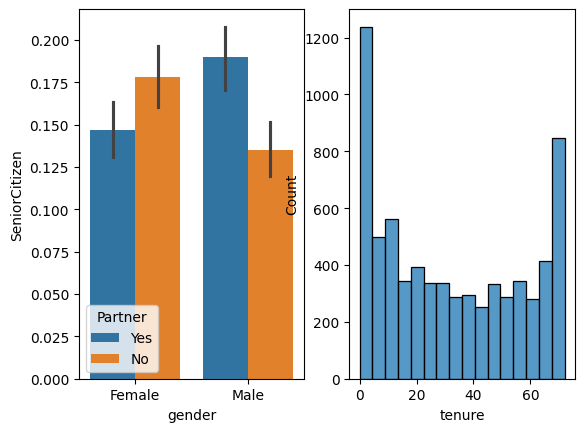

In [ ]:
plt.subplot(1,2,1)
sns.barplot(data = df,x= 'gender',y= 'SeniorCitizen',hue ='Partner')

plt.subplot(1,2,2)
sns.histplot(data=df,x= 'tenure')
plt.show()

# **Data Cleaning**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['customerID'] = LE.fit_transform(df['customerID'])
df['gender'] = LE.fit_transform(df['gender'])
df['Partner'] = LE.fit_transform(df['Partner'])
df['Dependents'] = LE.fit_transform(df['Dependents'])
df['PhoneService'] = LE.fit_transform(df['PhoneService'])
df['PaperlessBilling'] = LE.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = LE.fit_transform(df['PaymentMethod'])
df['Churn'] = LE.fit_transform(df['Churn'])

***Labelencoding these features because all the features are in Categorical values with no order and also unique values are More in numbers. And many features have Yes or No as the values***

In [ ]:
df['MultipleLines']       = df['MultipleLines'].replace({'No':0 ,'Yes':1,'No phone service':2})
df['InternetService']   = df['InternetService'].replace({'DSL':0 ,'Fiber optic':1,'No':2})
df['OnlineSecurity']     = df['OnlineSecurity'].replace({'No':0 ,'Yes':1,'No internet service':2})
df['OnlineBackup']         = df['OnlineBackup'].replace({'No':0 ,'Yes':1,'No internet service':2})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No':0 ,'Yes':1,'No internet service':2})
df['TechSupport']           = df['TechSupport'].replace({'No':0 ,'Yes':1,'No internet service':2})
df['StreamingTV']           = df['StreamingTV'].replace({'No':0 ,'Yes':1,'No internet service':2})
df['StreamingMovies']   = df['StreamingMovies'].replace({'No':0 ,'Yes':1,'No internet service':2})
df['Contract']                 = df['Contract'].replace({'Month-to-month':0 ,'One year':1,'Two year':2})

<ipython-input-134-5b7fa17bf9ad>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MultipleLines']       = df['MultipleLines'].replace({'No':0 ,'Yes':1,'No phone service':2})
<ipython-input-134-5b7fa17bf9ad>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['InternetService']   = df['InternetService'].replace({'DSL':0 ,'Fiber optic':1,'No':2})
<ipython-input-134-5b7fa17bf9ad>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

***Replacing features with 3 values because these can be easily determined for the further use***

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

# By doing this there can be null values so we need to fill it with
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

df['TotalCharges']=df['TotalCharges'].astype(float)

***'TotalCharges' is given in object datatypes even though it is in float format***

***df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce'): This line uses the pd.to_numeric function with the errors='coerce' argument. This will attempt to convert the values in the 'TotalCharges' column to numeric values. If it encounters any values that cannot be converted (like empty spaces), it will replace them with NaN (Not a Number) instead of raising an error***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3609,3130,0,0,0,0,61,1,1,1,0,...,1,0,1,1,1,1,2,103.95,6423.00,0
5562,5695,0,1,1,0,56,1,1,1,0,...,0,1,0,0,0,1,0,76.85,4275.75,0
461,4686,0,0,1,0,24,1,0,0,0,...,0,0,1,1,0,1,0,69.45,1614.05,0
6383,1605,1,0,0,1,23,0,2,0,1,...,1,1,0,0,2,0,3,40.10,857.75,0
6593,3292,1,0,1,0,55,0,2,0,0,...,1,1,1,1,0,1,0,54.55,2978.30,1


In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


# **Imbalanced Data To Oversampling**

***As the count of both yes and no are not about equal. Therefore we need to make it equal by neutralizing the churn count.***

In [ ]:
from imblearn.over_sampling import SMOTE

x = df.drop('Churn', axis = 1)
y = df['Churn']

smote = SMOTE(random_state = 42)

x_resampled, y_resampled = smote.fit_resample(x,y)

df = pd.concat([x_resampled , y_resampled], axis = 1)

df['Churn'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,count
Churn,
0,5174
1,5174


# **Data Correlation**

***Checking the correlation between the features to select the features which are suitable for the further steps of modeling***

In [ ]:
df_corr = df.corr()
df_corr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.004469,-0.000889,-0.011522,-0.004094,0.006766,-0.000314,0.027577,-0.004712,0.005468,...,-0.003416,-0.001236,0.002924,-0.012543,0.019678,0.026626,0.011929,0.001810,0.001490,-0.023373
gender,0.004469,1.000000,0.028573,0.075555,0.079491,0.087278,0.021586,0.046605,0.044824,0.087849,...,0.094445,0.093627,0.079712,0.084074,0.096477,0.014827,0.029295,-0.040548,0.057028,-0.170566
SeniorCitizen,-0.000889,0.028573,1.000000,0.062605,-0.140534,0.063324,0.021003,0.115979,0.007692,-0.124502,...,-0.076562,-0.134495,-0.061874,-0.046175,-0.067556,0.127861,-0.027714,0.169393,0.115383,0.011398
Partner,-0.011522,0.075555,0.062605,1.000000,0.474410,0.433293,0.052596,0.156485,0.067247,0.183236,...,0.203464,0.170041,0.175902,0.177109,0.359938,0.011345,-0.125614,0.056003,0.357137,-0.306912
Dependents,-0.004094,0.079491,-0.140534,0.474410,1.000000,0.221319,0.032537,0.038132,0.087258,0.276595,...,0.246824,0.268366,0.215073,0.204669,0.323458,-0.081318,-0.020831,-0.144118,0.108979,-0.319929
tenure,0.006766,0.087278,0.063324,0.433293,0.221319,1.000000,0.065433,0.304320,0.054411,0.215294,...,0.264842,0.212806,0.244484,0.246057,0.665129,0.044386,-0.333317,0.234079,0.857359,-0.411188
PhoneService,-0.000314,0.021586,0.021003,0.052596,0.032537,0.065433,1.000000,-0.539733,0.409929,0.122339,...,0.134873,0.120101,0.165721,0.152904,0.044887,0.029880,-0.012496,0.279329,0.149246,-0.054249
MultipleLines,0.027577,0.046605,0.115979,0.156485,0.038132,0.304320,-0.539733,1.000000,-0.250116,-0.126880,...,-0.084617,-0.128496,-0.086832,-0.070979,0.142513,0.105406,-0.115897,0.108147,0.295366,-0.103601
InternetService,-0.004712,0.044824,0.007692,0.067247,0.087258,0.054411,0.409929,-0.250116,1.000000,0.573376,...,0.615962,0.574561,0.663180,0.656066,0.150638,-0.072749,0.069345,-0.215152,-0.059583,-0.141822
OnlineSecurity,0.005468,0.087849,-0.124502,0.183236,0.276595,0.215294,0.122339,-0.126880,0.573376,1.000000,...,0.769605,0.817463,0.704834,0.710034,0.465192,-0.254476,0.063618,-0.597036,-0.061368,-0.477346


***Visualization of the correlation with heatmap***

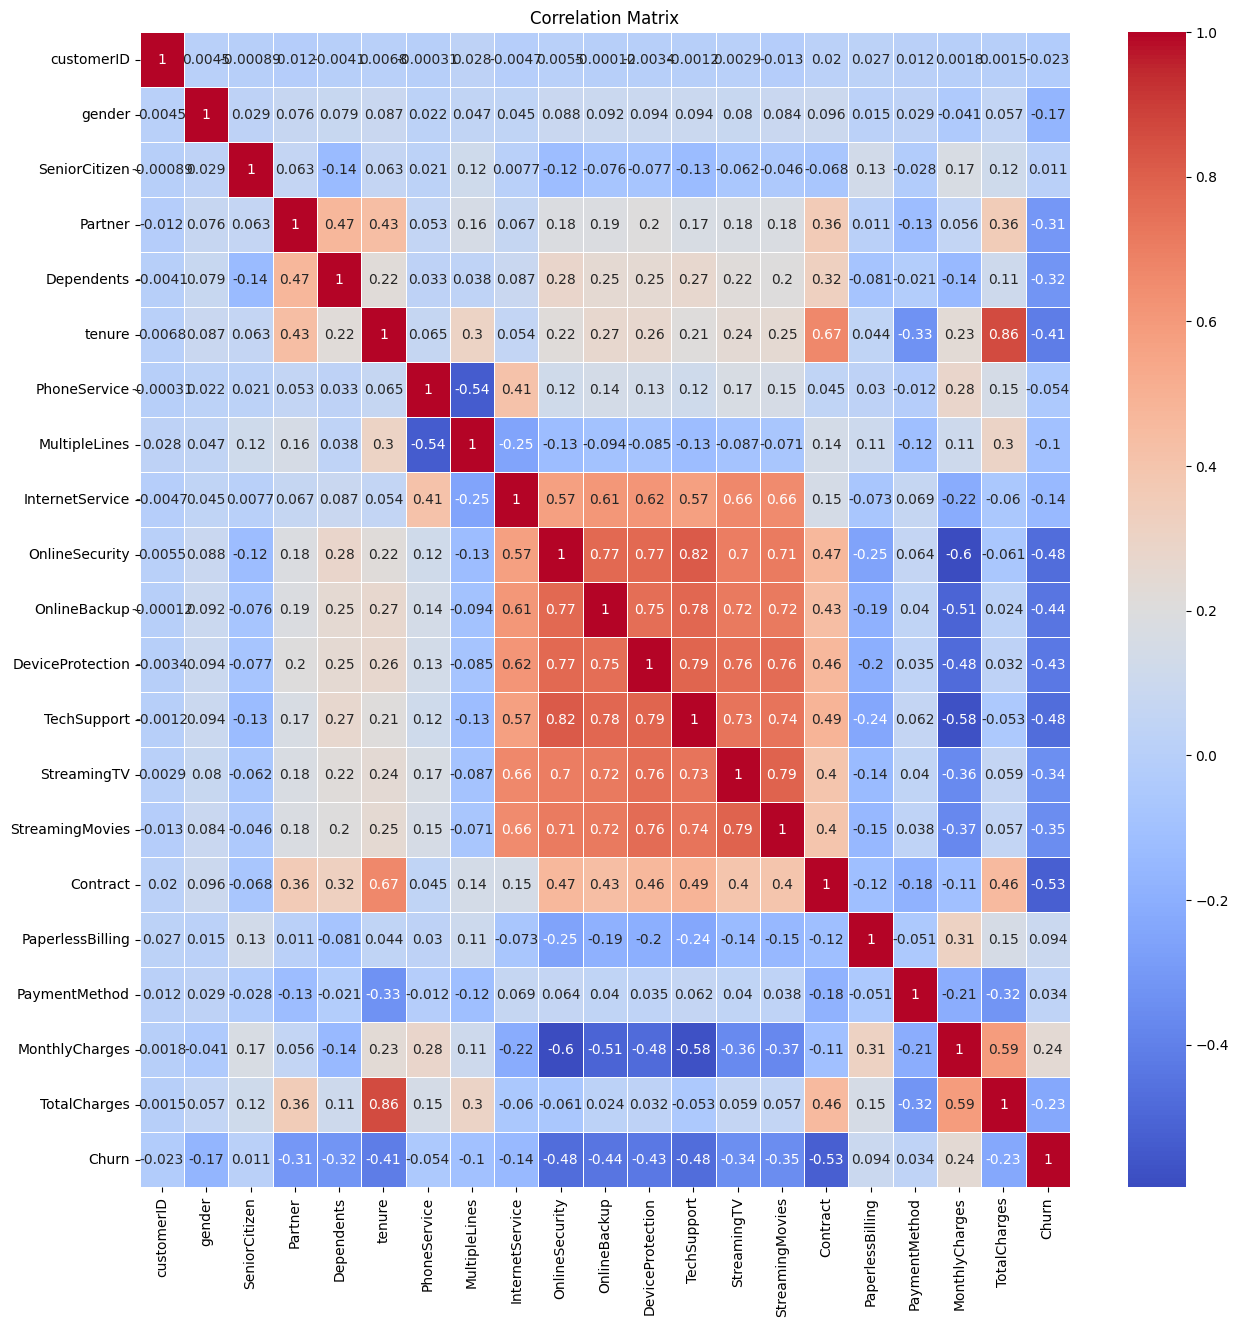

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df_corr,annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
churn_corr = df_corr['Churn'].sort_values(ascending = False).drop('Churn')
churn_corr

,Churn
MonthlyCharges,0.242703
PaperlessBilling,0.094441
PaymentMethod,0.033625
SeniorCitizen,0.011398
customerID,-0.023373
PhoneService,-0.054249
MultipleLines,-0.103601
InternetService,-0.141822
gender,-0.170566
TotalCharges,-0.231131


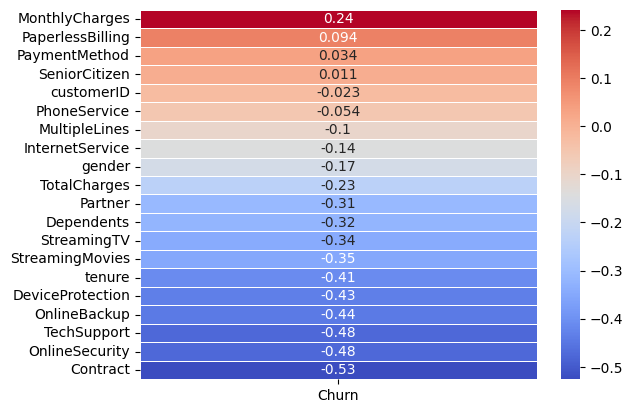

In [ ]:
sns.heatmap(churn_corr.to_frame(), annot = True, cmap = 'coolwarm', linewidth = 0.5, annot_kws = {'size': 10})
plt.show()

***Here By analysing the correlation matrix, we can finalize taking features with more correlation than | 0.2 |.***

***Even after selecting the Features with more correlation they posses same amout of dependency.***

In [ ]:
df = df[['MonthlyCharges','TotalCharges','Partner','Dependents','StreamingMovies','tenure','OnlineBackup','TechSupport','Contract','Churn']]
df

,MonthlyCharges,TotalCharges,Partner,Dependents,StreamingMovies,tenure,OnlineBackup,TechSupport,Contract,Churn
0,29.850000,29.850000,1,0,0,1,1,0,0,0
1,56.950000,1889.500000,0,0,0,34,0,0,1,0
2,53.850000,108.150000,0,0,0,2,1,0,0,1
3,42.300000,1840.750000,0,0,0,45,0,1,1,0
4,70.700000,151.650000,0,0,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
10343,82.013100,330.606756,0,0,1,4,0,0,0,1
10344,82.695630,103.780137,0,0,0,1,0,0,0,1
10345,82.448289,402.225684,0,0,0,5,0,0,0,1
10346,49.034218,193.200527,0,0,1,5,1,1,0,1


<Axes: >

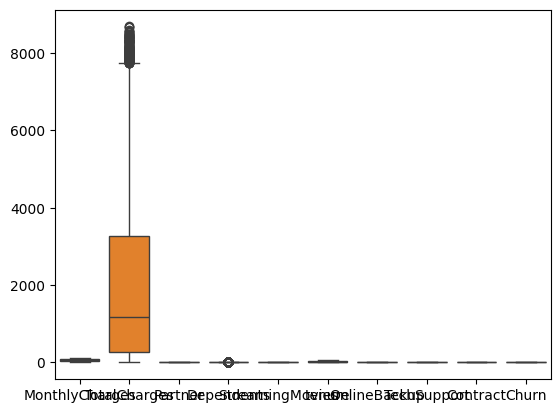

In [ ]:
sns.boxplot(df)

# **Data Skewness**

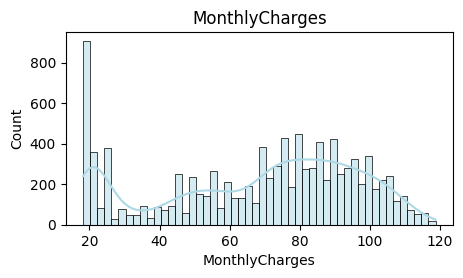

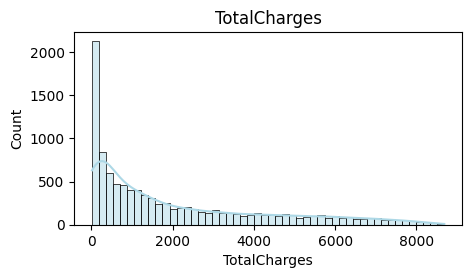

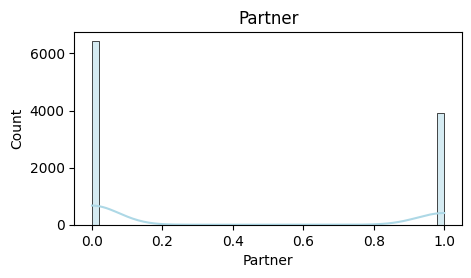

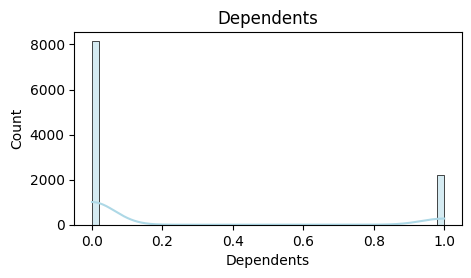

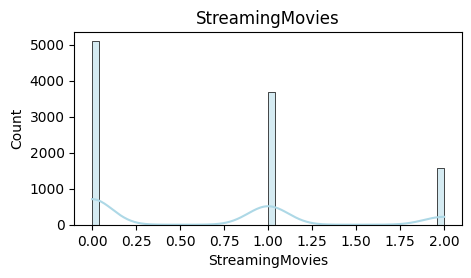

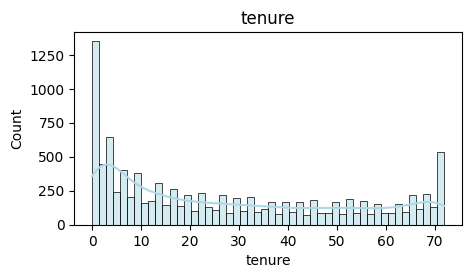

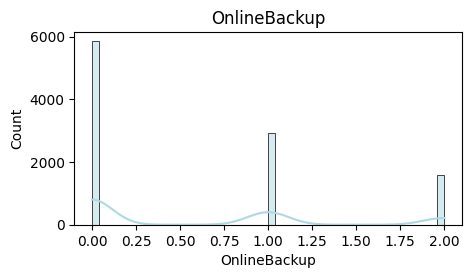

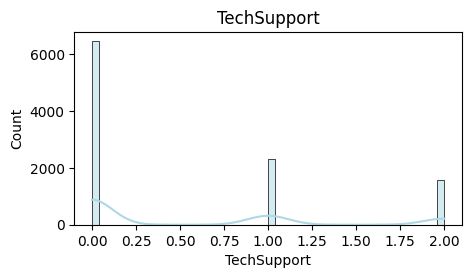

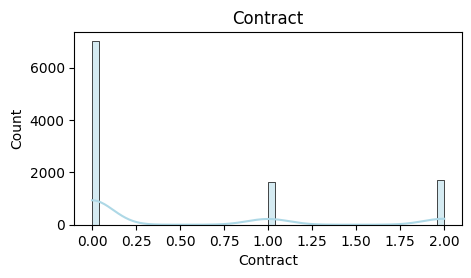

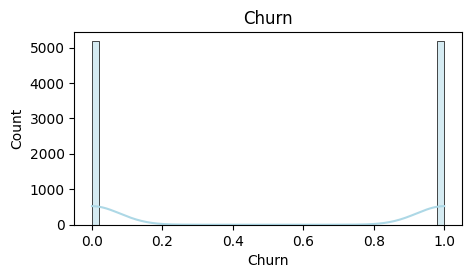

In [ ]:
for column in df.select_dtypes(include='number'):
    plt.figure(figsize=(5, 2.5))
    sns.histplot(df[column], kde=True, color='lightblue', edgecolor='black', bins=50)
    plt.title(f'{column}')
    plt.show()


***Minimizing the Skewness by using `np.log1p`***

In [ ]:
df['tenure'] = np.log1p(df['tenure'])
df['MonthlyCharges'] = np.log1p(df['MonthlyCharges'])
df['TotalCharges'] = np.log1p(df['TotalCharges'])

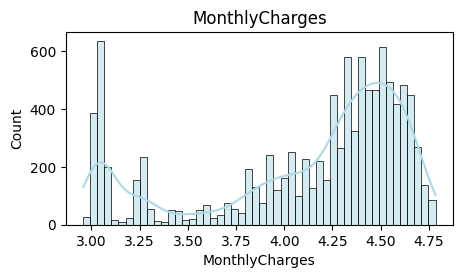

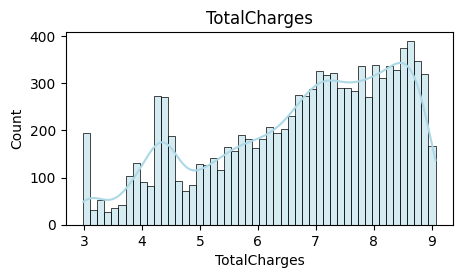

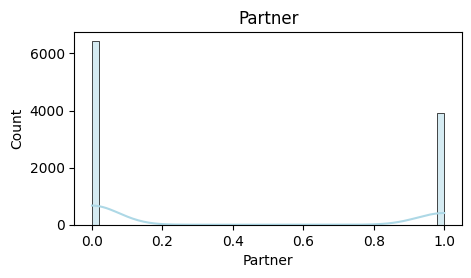

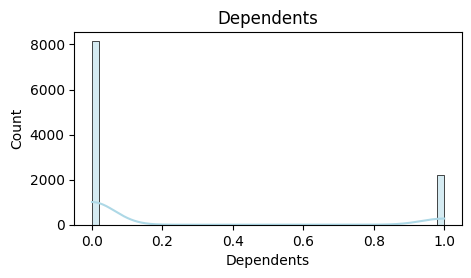

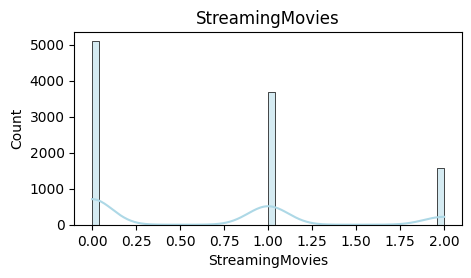

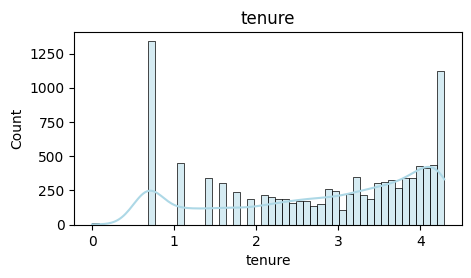

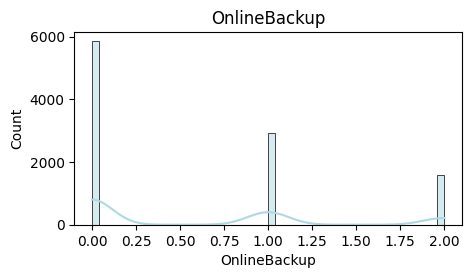

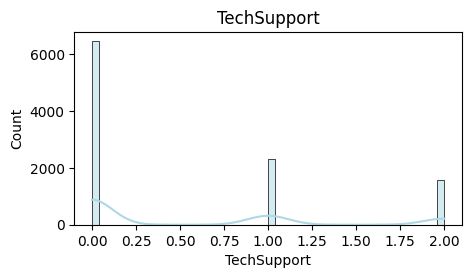

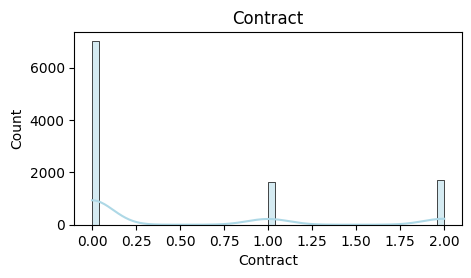

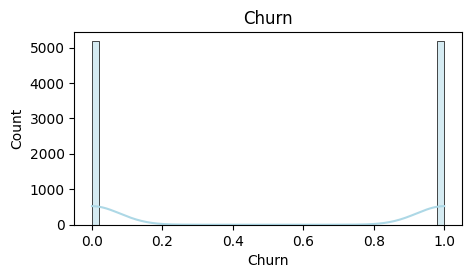

In [ ]:
for column in df.select_dtypes(include='number'):
    plt.figure(figsize=(5, 2.5))
    sns.histplot(df[column], kde=True, color='lightblue', edgecolor='black', bins=50)
    plt.title(f'{column}')
    plt.show()

In [ ]:
df_og = df
df_pca = df

## **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


x=df[['MonthlyCharges','TotalCharges','Partner','Dependents','StreamingMovies','tenure','OnlineBackup','TechSupport','Contract']]
y=df['Churn']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.5f}')
    print()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Logistic Regression accuracy: 0.80531


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1021
           1       0.77      0.87      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.81      0.80      2070

------------------------------
Decision Tree accuracy: 0.76280


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1021
           1       0.76      0.77      0.77      1049

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070

------------------------------
Random Forest accuracy: 0.81063


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      102

# **Data Scaling**

***MinMax scaling***

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = df.drop('Churn', axis = 1)

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_data, columns=features.columns, index=features.index)

df = scaled_df

## **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


x=df[['MonthlyCharges','TotalCharges','Partner','Dependents','StreamingMovies','tenure','OnlineBackup','TechSupport','Contract']]
y=df_og['Churn']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.5f}')
    print()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Logistic Regression accuracy: 0.80386


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1021
           1       0.77      0.87      0.82      1049

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070

------------------------------
Decision Tree accuracy: 0.76087


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1021
           1       0.76      0.76      0.76      1049

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070

------------------------------
Random Forest accuracy: 0.81498


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      102

***Random Forest accuracy: 0.81401***

The performance metrics from the Random Forest classification show the following insights:

1. **Accuracy**:  
   - The overall accuracy is **81.4%** (0.81401). This indicates that approximately 81% of the predictions made by the model are correct.

2. **Precision**:  
   - Class 0: **82%** of the predicted Class 0 labels are actually Class 0.  
   - Class 1: **81%** of the predicted Class 1 labels are actually Class 1.  

3. **Recall**:  
   - Class 0: **80%** of the actual Class 0 instances are correctly identified as Class 0.  
   - Class 1: **83%** of the actual Class 1 instances are correctly identified as Class 1.  

4. **F1-Score**:  
   - Class 0: **0.81** — this is the harmonic mean of precision and recall for Class 0.  
   - Class 1: **0.82** — this is the harmonic mean of precision and recall for Class 1.

5. **Support**:  
   - The model evaluated **1021 samples** for Class 0 and **1049 samples** for Class 1. The distribution is fairly balanced.

6. **Macro Average**:  
   - Precision, recall, and F1-score are all **0.81**, reflecting the unweighted average performance across both classes.

7. **Weighted Average**:  
   - Precision, recall, and F1-score are also **0.81**, but they take the class distribution into account.

### Observations:
- The model performs equally well on both classes, with no significant imbalance in precision, recall, or F1-scores.

# **PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features =['MonthlyCharges','TotalCharges','Partner','Dependents','StreamingMovies','tenure','OnlineBackup','TechSupport','Contract']
scaler = StandardScaler().fit_transform(df_pca[features])


# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Choose the desired number of components
pca_result = pca.fit_transform(scaler)


# Add PCA results to the DataFrame
df_pca['pca1'] = pca_result[:, 0]
df_pca['pca2'] = pca_result[:, 1]

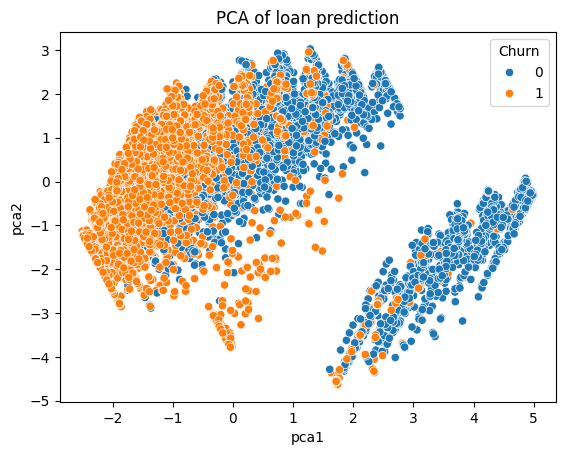

In [ ]:
# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2',hue = 'Churn', data=df_pca)
plt.title('PCA of loan prediction')
plt.show()

## **model training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


x=df_pca[['pca1','pca2']]
y=df_og['Churn']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.5f}')
    print()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Logistic Regression accuracy: 0.78261


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1021
           1       0.77      0.81      0.79      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070

------------------------------
Decision Tree accuracy: 0.73092


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1021
           1       0.74      0.73      0.73      1049

    accuracy                           0.73      2070
   macro avg       0.73      0.73      0.73      2070
weighted avg       0.73      0.73      0.73      2070

------------------------------
Random Forest accuracy: 0.76957


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      102